In [6]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [8]:
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

In [10]:
X_encoded = X.copy()
label_encoders = {}

In [12]:
# Encode features
for column in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    label_encoders[column] = le

In [16]:
# Encode target if categorical
if y.dtypes.iloc[0] == 'object':
    y = y.apply(LabelEncoder().fit_transform)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [22]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8759261307088355

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7985
           1       0.47      0.42      0.44      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.68      0.69      9043
weighted avg       0.87      0.88      0.87      9043



In [24]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid, cv=5, scoring='f1_macro'
)
grid_search.fit(X_train, y_train.values.ravel())

print("Best Parameters from GridSearchCV:", grid_search.best_params_)


Best Parameters from GridSearchCV: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


In [25]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nBest Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nBest Model Classification Report:\n", classification_report(y_test, y_pred_best))



Best Model Accuracy: 0.816874930885768

Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      7985
           1       0.37      0.80      0.50      1058

    accuracy                           0.82      9043
   macro avg       0.67      0.81      0.70      9043
weighted avg       0.90      0.82      0.84      9043



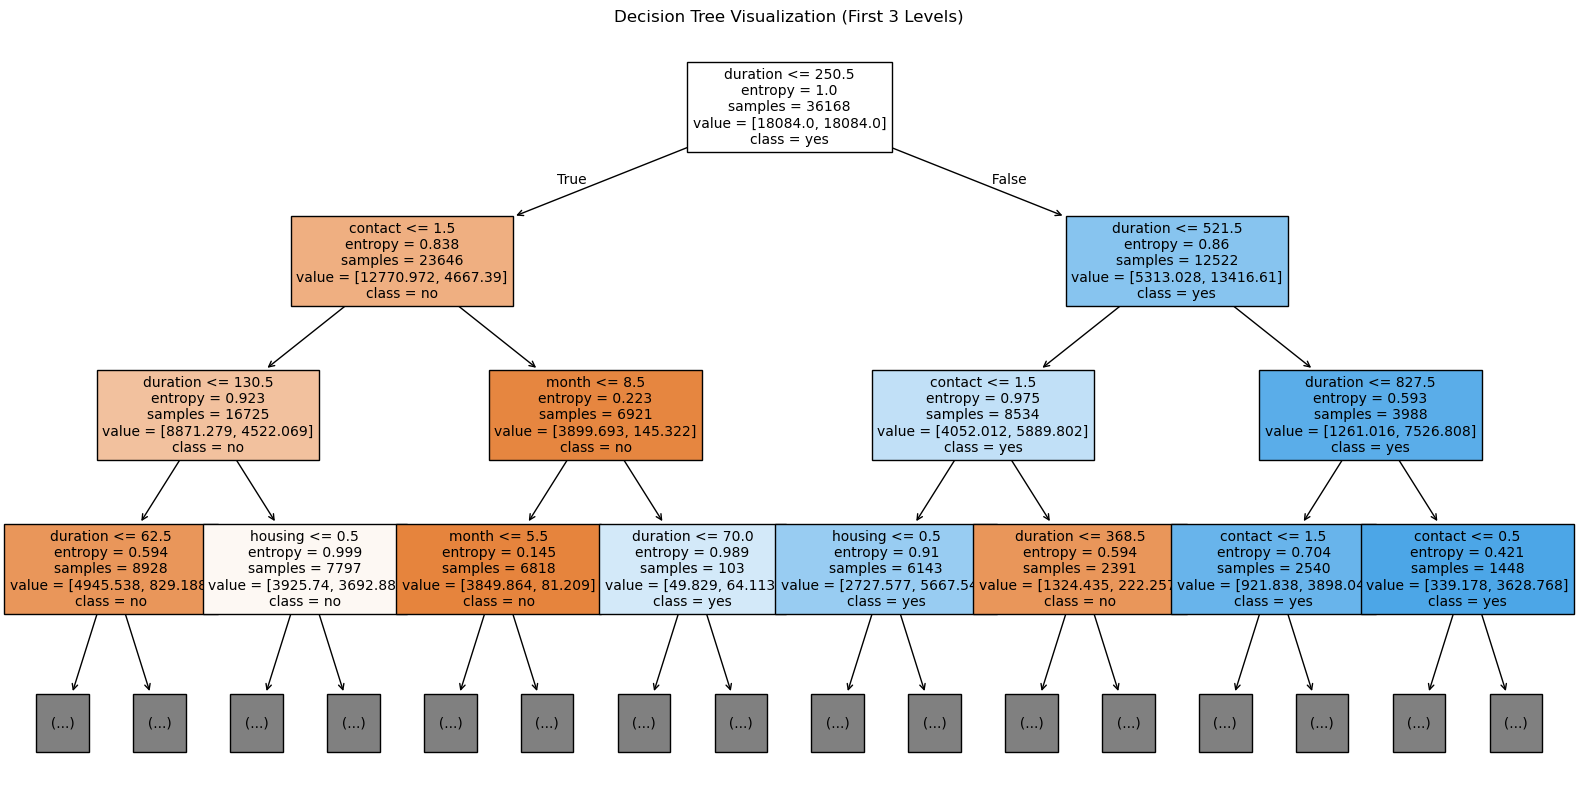

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_model, 
    feature_names=X_encoded.columns, 
    class_names=['no', 'yes'], 
    filled=True, 
    max_depth=3, 
    fontsize=10
)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

